# TASK QUES

In this task we have predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. So we are going to use linear regression for this

## This Code is written by Munawwar 

In [1]:
# Firstly we have to import libraries which we are going to use which are pandas (for data anlysis), numpy (for math computation) and matplot(for visuasls)
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### Load Dataset

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print("Data loaded successfully")

Data loaded successfully


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

Now we will plot our data points using a scatter plot to see if we can manually find any relationship between the data.

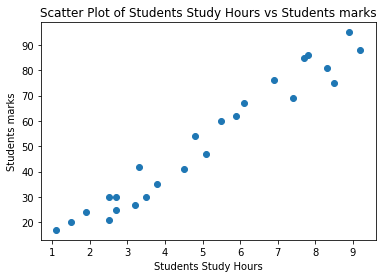

In [6]:
plt.scatter(x =df.Hours, y = df.Scores)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.
So linear regression will be fine to train model

## Cleaning and Preparing the Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### So as we can see there is no null value in the dataset so now  we can directly feed the data points into our model, so now our next step will be to split data into traing and testing set. To split this data into training and test sets we will use Scikit-Learn's built-in train_test_split() method:


In [9]:
# Splitting the data
x = df.drop("Scores", axis = "columns")
y = df.drop("Hours", axis = "columns")
print("shape of X = ", x.shape)
print("shape of y = ", y.shape)

shape of X =  (25, 1)
shape of y =  (25, 1)


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=1)

# So I have spilt data into 80:20,  80% to train and 20% to test

print("shape of x_train = ", x_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of x_test = ", x_test.shape)
print("shape of y_test = ", y_test.shape)

shape of x_train =  (20, 1)
shape of y_train =  (20, 1)
shape of x_test =  (5, 1)
shape of y_test =  (5, 1)


In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


In [12]:
print(regressor.coef_)     
print(regressor.intercept_)

[[10.46110829]]
[-1.53695733]


So after traing we got m = 10.46 and c = -1.53

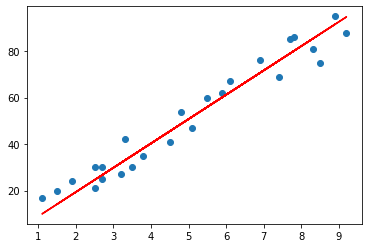

In [13]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_      # y = mx + c

# Plotting this against the test data
plt.scatter(x, y)
plt.plot(x, line,color ="r");
plt.show()

In [14]:
#Evaulating
print("Accuracy of our model is",(regressor.score(x_test,y_test)*100).round(2),"%")

Accuracy of our model is 84.21 %


In [15]:
# Now its time to make predictions and compare it with original 
pd.DataFrame(np.c_[x_test, y_test, regressor.predict(x_test)], columns = ["Hours", "scores_original","scores_predicted"])

,Hours,scores_original,scores_predicted
0,1.1,17.0,9.970262
1,3.3,42.0,32.984700
2,1.9,24.0,18.339148
3,8.5,75.0,87.382463
4,4.8,54.0,48.676362


In [16]:
# Ques what will be the predicted score if student studies 9.25hr/day
hours = 9.25
print("No. of hr studied",hours)
print("Predicted score",regressor.predict([[9.25]])[0][0].round(2))   


No. of hr studied 9.25
Predicted score 95.23


c:\users\mannu\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# TASK Completed